In [ ]:
# wrangle

## Exercises II

Let's set up an example scenario as perspective for our regression exercises using the Zillow dataset.

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the obervations from 2017.

In these exercises, you will complete the first step toward the above goal: acquire and prepare the necessary Zillow data from the zillow database in the Codeup database server.

1. Acquire `bedroomcnt`, `bathroomcnt`, `calculatedfinishedsquarefeet`, `taxvaluedollarcnt`, `yearbuilt`, `taxamount`, and `fips` from the `zillow` database for all 'Single Family Residential' properties.
1. Using your acquired Zillow data, walk through the summarization and cleaning steps in your `wrangle.ipynb` file like we did above. You may handle the missing values however you feel is appropriate and meaninful; remember to document your process and decisions using markdown and code commenting where helpful.
1. Store all of the necessary functions to automate your process from acquiring the data to returning a cleaned dataframe witn no missing values in your `wrangle.py` file. Name your final function `wrangle_zillow`.

In [4]:
# imports

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os 

from env import host, user, password # I already added my env to .gitignore first and then to my repository

## Acquire the data

In [5]:
# establishing get_connection function
def get_connection(db, user=user, host=host, password=password):
    '''
    This function gets my info from my env file and creats a connection url 
    
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

### after looking at the zillow database on sequel ace, I will need the following info
- codeup database
- zillow database
- properties_2017
- propertylandusetypeid
- 261	Single Family Residential
- bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips


In [6]:
# getting zillow data from codeup database

def new_zillow():
    
    sql_query ='''select bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips from properties_2017
    
    join propertylandusetype using(propertylandusetypeid)
    where propertylandusetypeid = 261'''
    
    df = pd.read_sql(sql_query, get_connection('zillow'))
    
    return df 

def wrangle_zillow():
    
    '''get connection, returns Zillow into a dataframe and creates a csv for us'''
    
    if os.path.isfile('zillow.csv'):
        
        df = pd.read_csv('zillow.csv', index_col=0)
    
    else:
        
        df = new_zillow()
        
        df.to_csv('zillow.csv')
    
    return df

In [7]:
df = wrangle_zillow() #assigning my function to df

In [8]:
df.head() # check_yo_head

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [9]:
# taking a look at the shape shows me 2152863 rows and 7 columns (because I only selected 7 columns from the db)
df.shape

(2152863, 7)

In [10]:
# get some initial statistics from the zillow data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2152852.0,3.287196,0.954754,0.00,3.00,3.00,4.00,25.00
bathroomcnt,2152852.0,2.230688,0.999280,0.00,2.00,2.00,3.00,32.00
calculatedfinishedsquarefeet,2144379.0,1862.855178,1222.125124,1.00,1257.00,1623.00,2208.00,952576.00
taxvaluedollarcnt,2152370.0,461896.237963,699676.049600,1.00,188170.25,327671.00,534527.00,98428909.00
yearbuilt,2143526.0,1960.949681,22.162196,1801.00,1949.00,1958.00,1976.00,2016.00
taxamount,2148421.0,5634.865978,8178.910249,1.85,2534.98,4108.95,6414.32,1337755.86
fips,2152863.0,6048.377335,20.433292,6037.00,6037.00,6037.00,6059.00,6111.00


In [11]:
# taking a look at the data type and it looks like all the values are 'float64'
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 131.4 MB


#### Acquire and Summarize Takeaways:
- intial imports and env file
- did initial get_connection fucntion
- connected to codeup db and then zillow db
- wrote sql query to retrieve required data from db
- created a function to aquire the zillow db 'wrangle_zillow'
- it looks like all data types are 'float64' and will need to be converted to int

## Prepare the Data

In [12]:
# Find the total number of Null values in each column of our DataFrame.

df.isnull().sum()

bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
dtype: int64

In [13]:
# Check for any Null values in each column of our DataFrame.

df.isnull().any()

bedroomcnt                       True
bathroomcnt                      True
calculatedfinishedsquarefeet     True
taxvaluedollarcnt                True
yearbuilt                        True
taxamount                        True
fips                            False
dtype: bool

In [14]:
# Return the names for any columns in our DataFrame with any Null values.

df.columns[df.isnull().any()]

Index(['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'yearbuilt', 'taxamount'],
      dtype='object')

In [15]:
# Check out the values and their frequencies from bedroomcnt column.

df.bedroomcnt.value_counts(dropna=False, ascending=True)

25.0         1
16.0         2
18.0         3
15.0         6
14.0         7
NaN         11
12.0        12
13.0        16
11.0        34
10.0       121
9.0        291
8.0       1107
7.0       4807
0.0      13187
1.0      23166
6.0      25166
5.0     150866
2.0     335473
4.0     634289
3.0     964298
Name: bedroomcnt, dtype: int64

In [16]:
# Check out the values and their frequencies from bathroomcnt column.

df.bathroomcnt.value_counts(dropna=False, ascending=True)

19.50         1
32.00         1
14.50         1
19.00         1
11.50         3
1.75          3
12.50         3
17.00         4
20.00         6
18.00         8
NaN          11
16.00        12
10.50        14
0.50         16
15.00        17
14.00        25
13.00        39
9.50         50
12.00        73
8.50        110
11.00       146
10.00       325
7.50        384
9.00        713
6.50       1333
8.00       1692
7.00       4394
5.50       6217
6.00      10747
0.00      13027
4.50      19506
5.00      28362
3.50      28518
1.50      31211
4.00      82155
2.50     142981
1.00     414324
3.00     422841
2.00     943589
Name: bathroomcnt, dtype: int64

In [17]:
# Check out the values and their frequencies from calculatedfinishedsquarefeet column.

df.calculatedfinishedsquarefeet.value_counts(dropna=False, ascending=True)

11830.0       1
9070.0        1
266.0         1
10324.0       1
9347.0        1
           ... 
1400.0     3833
1120.0     4362
1080.0     4389
1200.0     5195
NaN        8484
Name: calculatedfinishedsquarefeet, Length: 10581, dtype: int64

In [18]:
# Replace a whitespace sequence or empty with a NaN value and reassign this manipulation to df.

df = df.replace(r'^\s*$', np.nan, regex=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 131.4 MB


In [20]:
# Drop all rows with any Null values, assign to df, and verify.

df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 130.6 MB


In [21]:
# Change all column data tyes to int64, reassign to df, and verify.

df = df.astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype
---  ------                        -----
 0   bedroomcnt                    int64
 1   bathroomcnt                   int64
 2   calculatedfinishedsquarefeet  int64
 3   taxvaluedollarcnt             int64
 4   yearbuilt                     int64
 5   taxamount                     int64
 6   fips                          int64
dtypes: int64(7)
memory usage: 130.6 MB


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2140235.0,3.301419,0.932600,0.0,3.0,3.0,4.0,25.0
bathroomcnt,2140235.0,2.186612,0.973504,0.0,2.0,2.0,3.0,32.0
calculatedfinishedsquarefeet,2140235.0,1863.193970,1221.754161,1.0,1258.0,1623.0,2208.0,952576.0
taxvaluedollarcnt,2140235.0,460641.625164,677157.635675,22.0,189166.0,328296.0,534606.0,90188462.0
yearbuilt,2140235.0,1960.967545,22.150563,1801.0,1949.0,1958.0,1976.0,2016.0
taxamount,2140235.0,5616.218147,7814.562814,6.0,2540.0,4111.0,6411.0,1078101.0
fips,2140235.0,6048.309556,20.344910,6037.0,6037.0,6037.0,6059.0,6111.0


In [23]:
# Return the names for any columns in our DataFrame with any Null values.

df.columns[df.isnull().any()]

Index([], dtype='object')

## Bringing in functions from my wrangle.py file

In [24]:
# imports
from wrangle import wrangle_prep_zillow

In [25]:
# assigning my function to df
df = wrangle_prep_zillow(df)

In [26]:
df.head() #check_yo_head

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4,2,3633,296425,2005,6941,6037
6,3,4,1620,847770,2011,10244,6037
7,3,2,2077,646760,1926,7924,6037
11,0,0,1200,5328,1972,91,6037
14,0,0,171,6920,1973,255,6037


In [27]:
df.info() #$$$ my data type is now int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2128165 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype
---  ------                        -----
 0   bedroomcnt                    int64
 1   bathroomcnt                   int64
 2   calculatedfinishedsquarefeet  int64
 3   taxvaluedollarcnt             int64
 4   yearbuilt                     int64
 5   taxamount                     int64
 6   fips                          int64
dtypes: int64(7)
memory usage: 129.9 MB


In [28]:
df.isnull().sum() #$$$ I have no null values

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
dtype: int64

## Visualize Distributions

- We can plot histograms and/or boxplots to see the distributions of single variables and check for skewness, outliers, and unit scales. 
- Note, we don't have to split our data before exploring single variables. We DO have to split our data before performing bi- and multi-variate exploration.

In [35]:
# removing outliers
def remove_outliers(df, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df

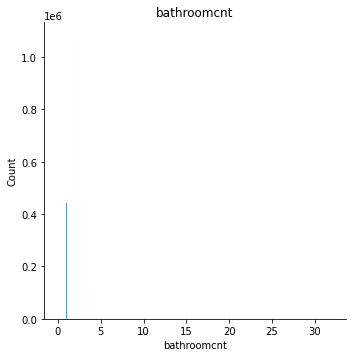

In [30]:
# The default is bins=10.

sns.displot(x='bathroomcnt', data=df)

plt.title('bathroomcnt')
plt.show()

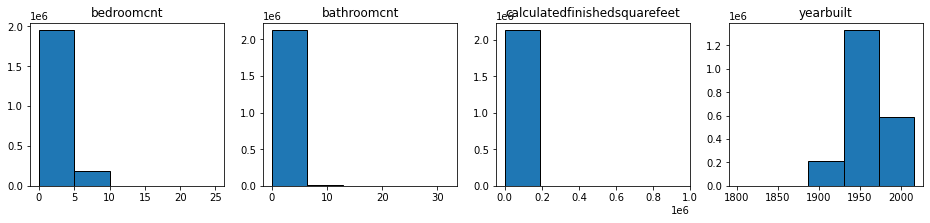

In [34]:
plt.figure(figsize=(16, 3))

# List of columns
cols = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'yearbuilt']

for i, col in enumerate(cols):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1,4, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    df[col].hist(bins=5, edgecolor='black')
    
    # Hide gridlines.
    plt.grid(False)

In [32]:
# showing cols
cols

['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'yearbuilt']

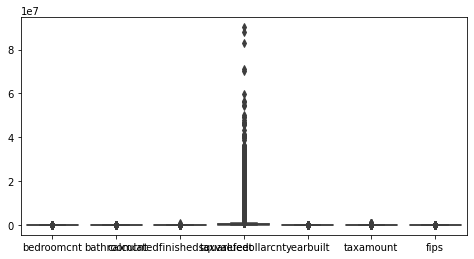

In [33]:


plt.figure(figsize=(8,4))

# Create boxplots
sns.boxplot(data=df)
plt.title('')

plt.show()